Import the necessary packages.

In [39]:
# data science packages...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import sklearn.metrics as met

# non-data science packages...
import zipfile as zip
import config

Now, we should extract our data set from the .zip file downloaded.

In [40]:
with zip.ZipFile(config.FILE_PATH, 'r') as zipfile:
    zipfile.extractall(config.DIR_PATH)

Next, we should extract the data from the .csv file into a pandas
DataFrame object.

In [41]:
data = pd.read_csv(f'{config.DIR_PATH}/HousingPrices-Amsterdam-August-2021.csv')
data

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


The first thing we should do with our data set is determine how many
observations it contains.

In [42]:
len(data)

924

Second, we should check if there are any missing values in the data.

In [43]:
data.isna().any()

Unnamed: 0    False
Address       False
Zip           False
Price          True
Area          False
Room          False
Lon           False
Lat           False
dtype: bool

It seems that the only feature in the data set with missing values is
the Price column. Let's inspect these observations.

In [44]:
data[data['Price'].isna()]

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
73,74,"Falckstraat 47 A, Amsterdam",1017 VV,NaN,147,3,4.897454,52.360707
321,322,"Haarlemmerweg 705, Amsterdam",1067 HP,NaN,366,12,4.787874,52.383877
610,611,"Zeeburgerkade 760, Amsterdam",1019 HT,NaN,107,3,4.945022,52.369244
727,728,"Suikerplein 16, Amsterdam",1013 CK,NaN,81,3,4.880976,52.389623


Since there are only 4 observations with missing Price values, we can
simply drop these observations from the data, as our data set is large
enough that dropping 4 rows wouldn't greatly affect our work.

In [45]:
data.dropna(subset=['Price'], inplace=True)
data.isna().any()

Unnamed: 0    False
Address       False
Zip           False
Price         False
Area          False
Room          False
Lon           False
Lat           False
dtype: bool

After dropping the rows with missing Price values, it looks like there are
no more missing values in our data set. We should double-check the size of
the data set to make sure only four rows were dropped.

In [46]:
len(data)

920

924 - 4 = 920. Since the length of the data set is now 920, it looks
like the four rows with missing data values were the only ones dropped.
At this point, we should consider dropping any features of the data which don't serve
the purpose of improving the quality of the data or the work we'll be performing on it.

One such feature would be the "Unnamed: 0" feature. It seems that the author of the original
data file included an index column. However, the author used 1-indexing, while pandas
DataFrame objects (at least in PyCharm) use 0-indexing. Either way, the author's index
column is redundant, as pandas uses its own indexing. Therefore, we should
drop the "Unnamed: 0" column from the data.

In [47]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
919,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


Now, we should check for duplicates in the data.

In [48]:
data.duplicated().any()

True

It looks like our data does contain duplicates. Let's inspect these
duplicate observations directly.

In [49]:
data[data.duplicated()]

,Address,Zip,Price,Area,Room,Lon,Lat
909,"Quashibastraat, Amsterdam",1087 VS,348738.0,79,4,5.016555,52.350513


There seems to be one duplicate entry in the data. However, the Address value of
the duplicate record doesn't contain unit number. Considering that Amsterdam is a city,
it is technically possible that this duplicate record is simply one of two apartments or condominiums in
the same building that are for sale. This would explain why there are two records with the
same latitude and longitude, as an apartment building only has one set of coordinates. It would
also explain why the price, area, and number of rooms is the same. Sometimes apartment buildings
use a set of templates when  constructing and designing the apartment units, so it's possible that
this record was built using the same template as the duplicated record, thus explaining the
equal area and room counts. Furthermore, if this record was another apartment which followed the same
template as the duplicated record, then selling them for the same prices would also make sense.
It would follow naturally that these two potential apartments would share a zip code, considering they'd
be in the same building, and since the Address value is simply a street name followed by the city name,
it would make sense that they'd be the same for both records: two apartment units in the same
building don't usually reside on different streets, at least in my experience, and of course they'd
both be in Amsterdam. One could make the argument that this duplicate record
is not actually a duplicate, and we've just synthesized a solid example to support this theory. Of course,
it is possible that it is a duplicate, however the circumstances of this particular record more likely
suggest that this is not the case.

Out of curiosity, I decided to perform a quick search on the Internet for apartments on Quashibastraat, Amsterdam;
a cropped screenshot of what I found is included in the data folder. The screenshot captures listings for
two apartments in the same apartment building on Quashibastraat. Both listings refer to apartments
which span 79 square meters, contain 4 bedrooms, and cost 348,738 Euros. Note: the screenshots list
"348.738" as the prices for both apartments. Another Internet search informed me that in Europe, a period is used
in place of a comma when separating groups of numbers, while the comma is used to represent a decimal point: for example,
to write one thousand and a half, Americans (and possibly the rest of North America, or even the Western Hemisphere, as I'm
not knowledgeable in this matter) would write "1,000.5" while Europeans would write "1.000,5". Therefore,
because the screenshot is from a Dutch website (I translated the text using a browser tool), it makes sense that
the price listing "348.738" would be the same as an "348,738" in the notation used commonly by Americans. Thus, it has been
proven that the duplicate record in the data is not actually a duplicate, so it should remain in the data set.

Now that I've spent the last hour descending into the rabbit's hole over a single
data record, let's continue with our work. The last thing we should do is reset the indexing
in the DataFrame containing our data: the indexing didn't adjust when we were cleaning our data, so
the greatest index value might be larger than the number of observations in our data set.

In [50]:
data.reset_index(drop=True, inplace=True)
data

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
915,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
916,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
917,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
918,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


At this point, we've thoroughly cleaned our data, so now let's try to discover relationships in the data through visualization. First,
we'll create two histograms of the Price field: one of the raw Price data, and the other
using log(Price) data. We're including the log(Price) histogram because it is common
that quantities such as house price follow power rules, so employing a log transformation in one
of the histograms will attempt to normalize the distribution in such a case.

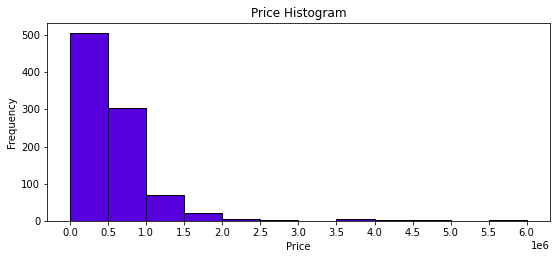

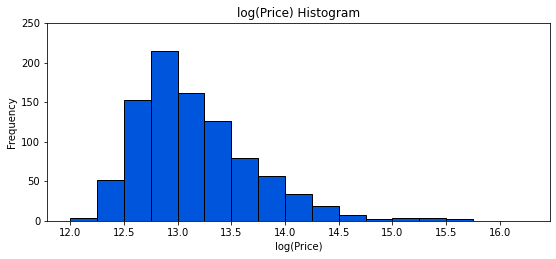

In [51]:
plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)
plt.hist(x=data['Price'], color='#5500dd', edgecolor='black',
         bins=np.arange(0, 6500000, 500000))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Histogram')
plt.xticks(range(0, 6500000, 500000))
plt.yticks(range(0, 600, 100))
plt.show()

plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 2)
plt.hist(x=np.log(data['Price']), color='#0055dd', edgecolor='black',
         bins=np.arange(12.0, 16.5, 0.25))
plt.xlabel('log(Price)')
plt.ylabel('Frequency')
plt.title('log(Price) Histogram')
plt.xticks(np.arange(12.0, 16.5, 0.5))
plt.yticks(range(0, 300, 50))
plt.show()

It looks like the Price feature did follow a sort of power rule, as the
log(Price) histogram seems much closer to a normal distribution than the
raw Price data histogram. Therefore, we should add a log(Price) feature to
the data set.

In [52]:
data['log(Price)'] = pd.Series(np.log(data['Price']))
data

,Address,Zip,Price,Area,Room,Lon,Lat,log(Price)
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,13.437174
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,13.071070
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,13.652992
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,13.270783
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,13.487006
...,...,...,...,...,...,...,...,...
915,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173,13.527828
916,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587,12.765688
917,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256,12.765688
918,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268,13.303017


Now, let's look at similar histograms for the Area feature.

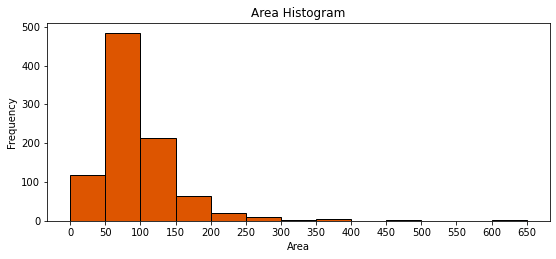

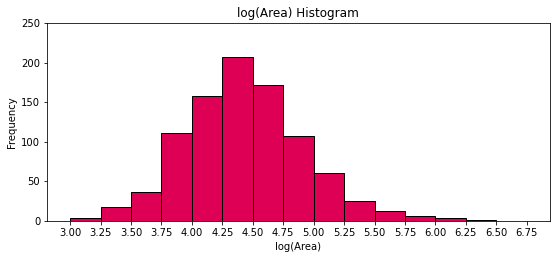

In [53]:
plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)
plt.hist(x=data['Area'], color='#dd5500', edgecolor='black',
         bins=np.arange(0, 700, 50))
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Area Histogram')
plt.xticks(range(0, 700, 50))
plt.yticks(range(0, 600, 100))
plt.show()

plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 2)
plt.hist(x=np.log(data['Area']), color='#dd0055', edgecolor='black',
         bins=np.arange(3.0, 7.0, 0.25))
plt.xlabel('log(Area)')
plt.ylabel('Frequency')
plt.xticks(np.arange(3.0, 7.0, 0.25))
plt.yticks(range(0, 300, 50))
plt.title('log(Area) Histogram')
plt.show()

The Area feature may also follow a power law distribution, as applying a log
transformation on the data yielded a distribution that is much more similar to
the normal distribution than the raw Area data. Thus, we should also add a log(Area)
feature to the data set.

In [54]:
data['log(Area)'] = pd.Series(np.log(data['Area']))
data

,Address,Zip,Price,Area,Room,Lon,Lat,log(Price),log(Area)
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,13.437174,4.158883
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,13.071070,4.094345
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,13.652992,4.691348
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,13.270783,4.852030
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,13.487006,4.927254
...,...,...,...,...,...,...,...,...,...
915,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173,13.527828,4.762174
916,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587,12.765688,4.276666
917,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256,12.765688,3.931826
918,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268,13.303017,4.727388


Now, let's repeat this histogram step for the Room feature.

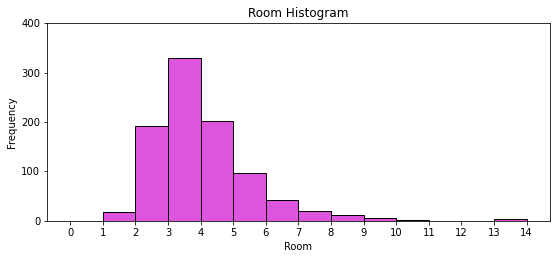

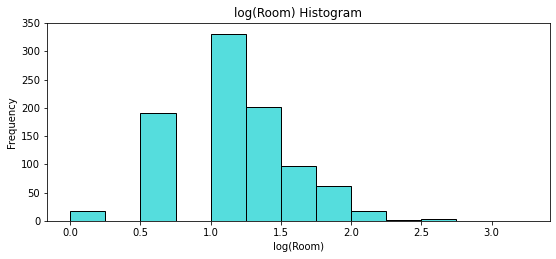

In [55]:
plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)
plt.hist(x=data['Room'], color='#dd55dd', edgecolor='black',
         bins=np.arange(0, 15, 1))
plt.xlabel('Room')
plt.ylabel('Frequency')
plt.title('Room Histogram')
plt.xticks(range(0, 15, 1))
plt.yticks(range(0, 500, 100))
plt.show()

plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 2)
plt.hist(x=np.log(data['Room']), color='#55dddd', edgecolor='black',
         bins=np.arange(0.0, 3.5, 0.25))
plt.xlabel('log(Room)')
plt.ylabel('Frequency')
plt.title('log(Room) Histogram')
plt.xticks(np.arange(0.0, 3.5, 0.5))
plt.yticks(range(0, 400, 50))
plt.show()

In this case, the log(Room) histogram doesn't seem too much different in shape
from the raw Room data histogram, with the exception that the log histogram seems to
be less spread out. Also, the raw Room data has much less of a spread than the previous
two features we worked with. Thus, it might not be beneficial to any future models we create
to include log(Room) in our data.

Now, we should create a heatmap to help us uncover any further relationships present
in our data set.

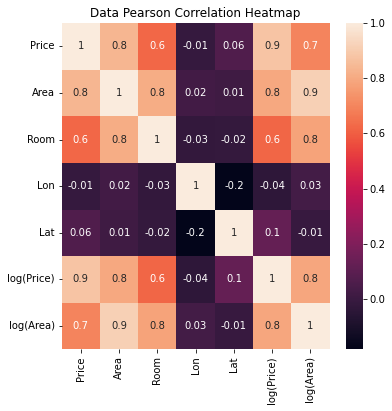

In [56]:
plt.figure(figsize=(6, 6))
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.1g')
plt.title('Data Pearson Correlation Heatmap')
plt.show()

If we want to predict the price of a house/property in Amsterdam, then
it seems like the most relevant features are Area, Room, and log(Area).
We should test this observation by constructing regression models to predict
housing prices based on these features.

Let's start by splitting our data into training data and testing data.

In [57]:
# store non-Price related data in its own variable...
X = data.iloc[:, [0, 1, 3, 4, 5, 6, 8]]
X

,Address,Zip,Area,Room,Lon,Lat,log(Area)
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,64,3,4.907736,52.356157,4.158883
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,60,3,4.850476,52.348586,4.094345
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,109,4,4.944774,52.343782,4.691348
3,"Tenerifestraat 40, Amsterdam",1060 TH,128,6,4.789928,52.343712,4.852030
4,"Winterjanpad 21, Amsterdam",1036 KN,138,5,4.902503,52.410538,4.927254
...,...,...,...,...,...,...,...
915,"Ringdijk, Amsterdam",1097 AE,117,1,4.927757,52.354173,4.762174
916,"Kleine Beerstraat 31, Amsterdam",1033 CP,72,3,4.890612,52.414587,4.276666
917,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,51,3,4.856935,52.363256,3.931826
918,"John Blankensteinstraat 51, Amsterdam",1095 MB,113,4,4.965731,52.375268,4.727388


In [58]:
# store target Price related data in own variables...
y = data.iloc[:, [2]]
y

,Price
0,685000.0
1,475000.0
2,850000.0
3,580000.0
4,720000.0
...,...
915,750000.0
916,350000.0
917,350000.0
918,599000.0


In [59]:
# use scikit-learn train_test_split function to split data
# into training and testing data sets...
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.25, random_state=0)

In [60]:
# view X_train...
X_train

,Address,Zip,Area,Room,Lon,Lat,log(Area)
279,"Amstel 102, Amsterdam",1017 AD,150,6,4.896842,52.366965,5.010635
451,"Joop Gerritzestraat 14, Amsterdam",1063 EK,113,6,4.830151,52.383526,4.727388
39,"C.J.K. van Aalststraat 94 PP, Amsterdam",1019 JX,163,6,4.937040,52.373016,5.093750
557,"Beemsterstraat 517, Amsterdam",1024 BE,122,5,4.950277,52.396263,4.804021
548,"Kolfschotenstraat 154, Amsterdam",1104 PC,83,4,4.969802,52.316702,4.418841
...,...,...,...,...,...,...,...
835,"Hertspieghelweg 6 I, Amsterdam",1055 KL,59,3,4.852415,52.380133,4.077537
192,"Gerrit van der Veenstraat 134, Amsterdam",1077 ES,154,4,4.867645,52.348806,5.036953
629,"Funenpark 349, Amsterdam",1018 AK,101,4,4.931075,52.369038,4.615121
559,"Willem Kromhoutstraat 17, Amsterdam",1067 RC,77,4,4.795007,52.375474,4.343805


In [61]:
# view X_test...
X_test

,Address,Zip,Area,Room,Lon,Lat,log(Area)
306,"Termietergouw 6, Amsterdam",1027 AD,95,3,4.960756,52.409584,4.553877
711,"Eerste Jacob van Campenstraat 54 III-IV, Amste...",1072 BH,127,4,4.889858,52.357323,4.844187
298,"Pontsteiger 137, Amsterdam",1014 ZP,94,1,4.886388,52.393577,4.543295
466,"Alfred Döblinstraat 109, Amsterdam",1102 VJ,71,3,4.943523,52.319589,4.262680
253,"Bakkersstraat 11, Amsterdam",1017 CW,81,3,4.897432,52.366729,4.394449
...,...,...,...,...,...,...,...
352,"Blauwvoetstraat 59, Amsterdam",1061 BM,39,2,4.839165,52.377010,3.663562
172,"Westerstraat 268, Amsterdam",1015 MT,109,4,4.879612,52.377871,4.691348
479,"Amazonenstraat 20 1, Amsterdam",1076 LJ,54,2,4.862373,52.345315,3.988984
330,"Bernard Shawsingel 250, Amsterdam",1102 VE,60,3,4.945909,52.320409,4.094345


In [62]:
# view y_train...
y_train

,Price
279,2325000.0
451,500000.0
39,895000.0
557,525000.0
548,260000.0
...,...
835,375000.0
192,1295000.0
629,725000.0
559,380000.0


In [63]:
# view y_test...
y_test

,Price
306,895000.0
711,995000.0
298,950000.0
466,265000.0
253,650000.0
...,...
352,275000.0
172,950000.0
479,415000.0
330,250000.0


First, we should create a baseline model that we can use for benchmarking. Let's
use only the Area feature in this simple model.

In [64]:
# only include Area feature in variables for basic regression model...
X_train_basic = np.array(X_train['Area']).reshape(-1, 1)
X_test_basic = np.array(X_test['Area']).reshape(-1, 1)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [65]:
# create basic regression model...
basic_reg = lm.LinearRegression()
basic_reg.fit(X_train_basic, y_train)

LinearRegression()

In [66]:
# use basic model to generate predictions for Price, then determine R2 score...
y_pred_basic = basic_reg.predict(X_test_basic)
r2_basic_reg = round(met.r2_score(y_test, y_pred_basic), 4)
print(f'R2 Score for Basic Regression: {r2_basic_reg}')

R2 Score for Basic Regression: 0.736


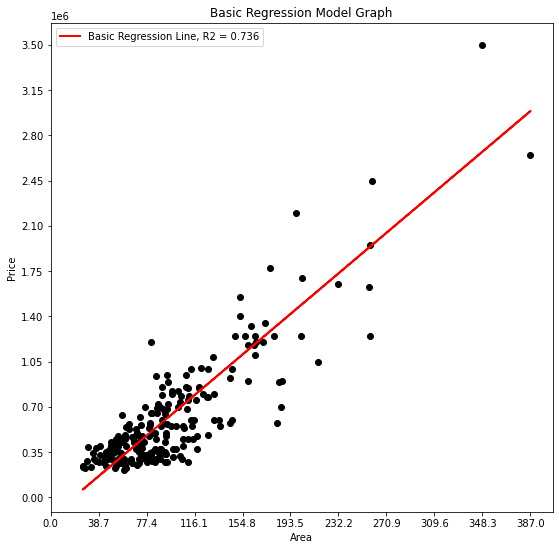

In [67]:
# graph basic model...
plt.figure(figsize=(9, 9))
plt.scatter(X_test_basic, y_test, color='black')
plt.plot(X_test_basic, y_pred_basic, color='red',
         lw=2, label=f'Basic Regression Line, R2 = {r2_basic_reg}')
plt.ylabel('Price')
plt.xlabel('Area')
plt.title('Basic Regression Model Graph')
plt.xticks(np.arange(0, round(np.max(X_test_basic) + (np.max(X_test_basic) / 10), 2), round(np.max(X_test_basic) / 10, 4)))
plt.yticks(np.arange(0, round(np.maximum(np.max(y_test) + (np.max(y_test) / 10),
                                         np.max(y_pred_basic) + (np.max(y_pred_basic) / 10)), 2),
                     round(np.maximum(np.max(y_test) / 10, np.max(y_pred_basic) / 10), 4)))
plt.legend()
plt.show()

Now, let's create a multivariable regression model that uses
the Area and Room features.

In [68]:
# include Area and Room features as variables in for
# multivariable regression model...
X_train_multi = np.array(X_train[['Area', 'Room']])
X_test_multi = np.array(X_test[['Area', 'Room']])

In [69]:
# create multivariable regression model and fit...
multi_reg = lm.LinearRegression()
multi_reg.fit(X_train_multi, y_train)


LinearRegression()

In [70]:
# use multivariable model to generate predictions for Price, then determine R2 score...
y_pred_multi = multi_reg.predict(X_test_multi)
r2_multi_reg = round(met.r2_score(y_test, y_pred_multi), 4)
print(f'R2 Score for Multivariable Regression: {r2_multi_reg}')

R2 Score for Multivariable Regression: 0.74


It seems like our multivariable regression model doesn't do much
better than the basic model. Therefore, in accordance with Occam's Razor,
we reject the more complex model in favor of the simpler model considering the
lack of improvement shown in the complex model.

However, we haven't tested any models with the log(Price) feature
that we engineered earlier. Let's try to use the basic model to do this.

In [71]:
# log-transform the target Price data...
y_log_train = np.log(y_train)
y_log_test = np.log(y_test)

In [72]:
# create log basic model and fit...
log_basic_reg = lm.LinearRegression()
log_basic_reg.fit(X_train_basic, y_log_train)

LinearRegression()

In [73]:
# use log basic model to generate predictions for log(Price), then determine R2 score...
y_pred_log_basic = log_basic_reg.predict(X_test_basic)
r2_log_basic_reg = met.r2_score(y_log_test, y_pred_log_basic)
print(f'R2 Score for Log Basic Regression Model: {round(r2_log_basic_reg, 4)}')

R2 Score for Log Basic Regression Model: 0.6519


It seems that the log basic model usually did much worse than both the basic
model and the multivariable model. However, one last model we should try
is a log log basic model: one that uses the log(Area) feature to predict log(Price), instead
of using the raw Area feature.

In [74]:
# log transform the basic data...
X_train_log_log = np.log(X_train_basic)
X_test_log_log = np.log(X_test_basic)

In [75]:
# create the log log model and fit...
log_log_reg = lm.LinearRegression()
log_log_reg.fit(X_train_log_log, y_log_train)

LinearRegression()

In [76]:
# use log log model to generate predictions for log(Price), then determine R2 score...
y_pred_log_log = log_log_reg.predict(X_test_log_log)
r2_log_log_reg = met.r2_score(y_log_test, y_pred_log_log)
print(f'R2 Score for Log Log Regression Model: {round(r2_log_log_reg, 4)}')

R2 Score for Log Log Regression Model: 0.6329


It looks like the log log model does worse than the basic model we
started with. Therefore, we should continue to abide by Occam's Razor
and accept the basic model we first created as a sufficient model for
predicting housing prices in Amsterdam.